In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import folium
from matplotlib import font_manager, rc

#### 주유소 위경도 csv 파일 불러오기

In [26]:
df = pd.read_csv('./data/주유소 위경도.csv', encoding='utf-8')
df.head()

,상호,주소,Unnamed: 2
0,(주)개금태화주유소,부산 부산진구 가야대로 402,"X :129.016910, Y :35.1514817"
1,(주)경인석유,부산 남구 신선로 448 (용당동),"X :129.100468, Y :35.1248122"
2,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),"X :128.897647, Y :35.1248039"
3,(주)고리길천주유소,부산 기장군 장안읍 해맞이로 487,"X :129.289381, Y :35.3315196"
4,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),"X :129.047706, Y :35.0948319"


#### 컬럼 값이 없는 것을 위경도로 설정해준다, 값이 없는 392,393 행 제거 

In [27]:
df.rename(columns={'Unnamed: 2' : '위경도'}, inplace=True)
df = df.drop(index=392, axis=0)
df = df.drop(index=393, axis=0)
df

,상호,주소,위경도
0,(주)개금태화주유소,부산 부산진구 가야대로 402,"X :129.016910, Y :35.1514817"
1,(주)경인석유,부산 남구 신선로 448 (용당동),"X :129.100468, Y :35.1248122"
2,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),"X :128.897647, Y :35.1248039"
3,(주)고리길천주유소,부산 기장군 장안읍 해맞이로 487,"X :129.289381, Y :35.3315196"
4,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),"X :129.047706, Y :35.0948319"
...,...,...,...
387,SK에너지(주)신광셀프주유소,부산 북구 덕천로 275 (만덕동),"X :129.034087, Y :35.2098781"
388,SK에너지(주)신도시주유소,부산 해운대구 대천로 82 (좌동),"X :129.171720, Y :35.1735968"
389,SK에너지(주)직영 태종로주유소,부산 영도구 태종로 290 (청학동),"X :129.057642, Y :35.0979530"
390,SK에너지(주)직영 해운대센텀주유소,부산 해운대구 수영강변대로 276,"X :129.119134, Y :35.1835484"


##### 위경도 컬럼에서의 값들을 ,로 둘로 나누고 i번째의 경도 컬럼에 넣어준다

In [28]:
df['위경도'] = df['위경도'].str.split(',')
df['위경도']

0      [X :129.016910,  Y :35.1514817 ]
1       [X :129.100468,  Y :35.1248122]
2       [X :128.897647,  Y :35.1248039]
3       [X :129.289381,  Y :35.3315196]
4       [X :129.047706,  Y :35.0948319]
                     ...               
387     [X :129.034087,  Y :35.2098781]
388     [X :129.171720,  Y :35.1735968]
389     [X :129.057642,  Y :35.0979530]
390    [X :129.119134,  Y :35.1835484 ]
391    [X :129.097491,  Y :35.1203309 ]
Name: 위경도, Length: 392, dtype: object

#### 경도 컬럼에 위경도의 값들을 ,로 둘로 나누고 i번째의 0번째의 값을 가져온다

In [29]:
df['경도'] = 0

for i in df.index:
    df['경도'][i] = df['위경도'].str.split(',')[i][0]

df

IndexError: invalid index to scalar variable.

##### 위도 컬럼에 위경도의 값들을 ,로 둘로 나누고 i번째의 0번째의 값을 가져온다

In [ ]:
df['위도'] = 0

for i in df.index:
    df['위도'][i] = (df['위경도'].str.split(',')[i][1])
df

C:\Users\admin\AppData\Local\Temp\ipykernel_15556\3340694080.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['위도'][i] = (df['위경도'].str.split(',')[i][1])


,상호,주소,위경도,경도,위도
0,(주)개금태화주유소,부산 부산진구 가야대로 402,"X :129.016910, Y :35.1514817",X :129.016910,Y :35.1514817
1,(주)경인석유,부산 남구 신선로 448 (용당동),"X :129.100468, Y :35.1248122",X :129.100468,Y :35.1248122
2,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),"X :128.897647, Y :35.1248039",X :128.897647,Y :35.1248039
3,(주)고리길천주유소,부산 기장군 장안읍 해맞이로 487,"X :129.289381, Y :35.3315196",X :129.289381,Y :35.3315196
4,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),"X :129.047706, Y :35.0948319",X :129.047706,Y :35.0948319
...,...,...,...,...,...
387,SK에너지(주)신광셀프주유소,부산 북구 덕천로 275 (만덕동),"X :129.034087, Y :35.2098781",X :129.034087,Y :35.2098781
388,SK에너지(주)신도시주유소,부산 해운대구 대천로 82 (좌동),"X :129.171720, Y :35.1735968",X :129.171720,Y :35.1735968
389,SK에너지(주)직영 태종로주유소,부산 영도구 태종로 290 (청학동),"X :129.057642, Y :35.0979530",X :129.057642,Y :35.0979530
390,SK에너지(주)직영 해운대센텀주유소,부산 해운대구 수영강변대로 276,"X :129.119134, Y :35.1835484",X :129.119134,Y :35.1835484


##### 경도, 위도 컬럼 값들중 필요없는 (X :, Y :)을 공백으로 변환

In [ ]:
df['경도'] = df['경도'].str.replace('X :', '')
df['위도'] = df['위도'].str.replace('Y :', '')
df.head()

,상호,주소,위경도,경도,위도
0,(주)개금태화주유소,부산 부산진구 가야대로 402,"X :129.016910, Y :35.1514817",129.016910,35.1514817
1,(주)경인석유,부산 남구 신선로 448 (용당동),"X :129.100468, Y :35.1248122",129.100468,35.1248122
2,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),"X :128.897647, Y :35.1248039",128.897647,35.1248039
3,(주)고리길천주유소,부산 기장군 장안읍 해맞이로 487,"X :129.289381, Y :35.3315196",129.289381,35.3315196
4,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),"X :129.047706, Y :35.0948319",129.047706,35.0948319


##### 위경도 컬럼 제거

In [ ]:
df = df.drop(columns='위경도')
df.head()

,상호,주소,경도,위도
0,(주)개금태화주유소,부산 부산진구 가야대로 402,129.016910,35.1514817
1,(주)경인석유,부산 남구 신선로 448 (용당동),129.100468,35.1248122
2,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),128.897647,35.1248039
3,(주)고리길천주유소,부산 기장군 장안읍 해맞이로 487,129.289381,35.3315196
4,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),129.047706,35.0948319


##### 주유소_유가_데이터_NaN제외 csv파일 가져오기

In [ ]:
data = pd.read_csv('./data/주유소_유가_데이터_NaN제외.csv', encoding='utf-8')
data.head()

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유
0,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220209,S-OIL,셀프,1638,1498
1,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220210,S-OIL,셀프,1638,1498
2,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220211,S-OIL,셀프,1638,1498
3,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220212,S-OIL,셀프,1638,1498
4,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220213,S-OIL,셀프,1638,1498


##### 필요한 컬럼값들로 구성된 데이터를 만들어서 중복되는 값을 제거

In [ ]:
columns = ['상호', '셀프여부', '상표']
data_get = data[columns].copy()
data_get = data_get.drop_duplicates(subset=None, keep='first', ignore_index=False)
data_get

,상호,셀프여부,상표
0,(주)DJS신항만물류단지주유소,셀프,S-OIL
182,(주)경인에너지,일반,S-OIL
364,(주)만은에너지 대사리주유소,셀프,GS칼텍스
546,(주)범방주유소,일반,SK에너지
728,(주)비에스이강동주유소,셀프,현대오일뱅크
...,...,...,...
68615,해변주유소,셀프,SK에너지
68797,해운대주유소,셀프,S-OIL
68979,현대오일뱅크(주)직영 장산IC주유소,일반,GS칼텍스
69088,현대오일뱅크(주)직영 장산IC주유소,일반,현대오일뱅크


##### df, data_get 데이터를 merge로 합친다

In [ ]:
all_data = pd.merge(df, data_get, how='inner')
all_data

,상호,주소,경도,위도,셀프여부,상표
0,(주)개금태화주유소,부산 부산진구 가야대로 402,129.016910,35.1514817,셀프,SK에너지
1,(주)경인석유,부산 남구 신선로 448 (용당동),129.100468,35.1248122,셀프,SK에너지
2,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),128.897647,35.1248039,일반,S-OIL
3,(주)고리길천주유소,부산 기장군 장안읍 해맞이로 487,129.289381,35.3315196,일반,S-OIL
4,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),129.047706,35.0948319,일반,SK에너지
...,...,...,...,...,...,...
393,SK에너지(주)신광셀프주유소,부산 북구 덕천로 275 (만덕동),129.034087,35.2098781,셀프,SK에너지
394,SK에너지(주)신도시주유소,부산 해운대구 대천로 82 (좌동),129.171720,35.1735968,셀프,SK에너지
395,SK에너지(주)직영 태종로주유소,부산 영도구 태종로 290 (청학동),129.057642,35.0979530,셀프,SK에너지
396,SK에너지(주)직영 해운대센텀주유소,부산 해운대구 수영강변대로 276,129.119134,35.1835484,셀프,SK에너지


In [ ]:
data_get.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 69149
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      397 non-null    object
 1   셀프여부    397 non-null    object
 2   상표      397 non-null    object
dtypes: object(3)
memory usage: 12.4+ KB


##### 폰트를 NanumBarunpenB로 설정해주자

In [ ]:
font_path = 'C:/windows/fonts/NanumBarunpenB.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

##### 표를 만들기위함

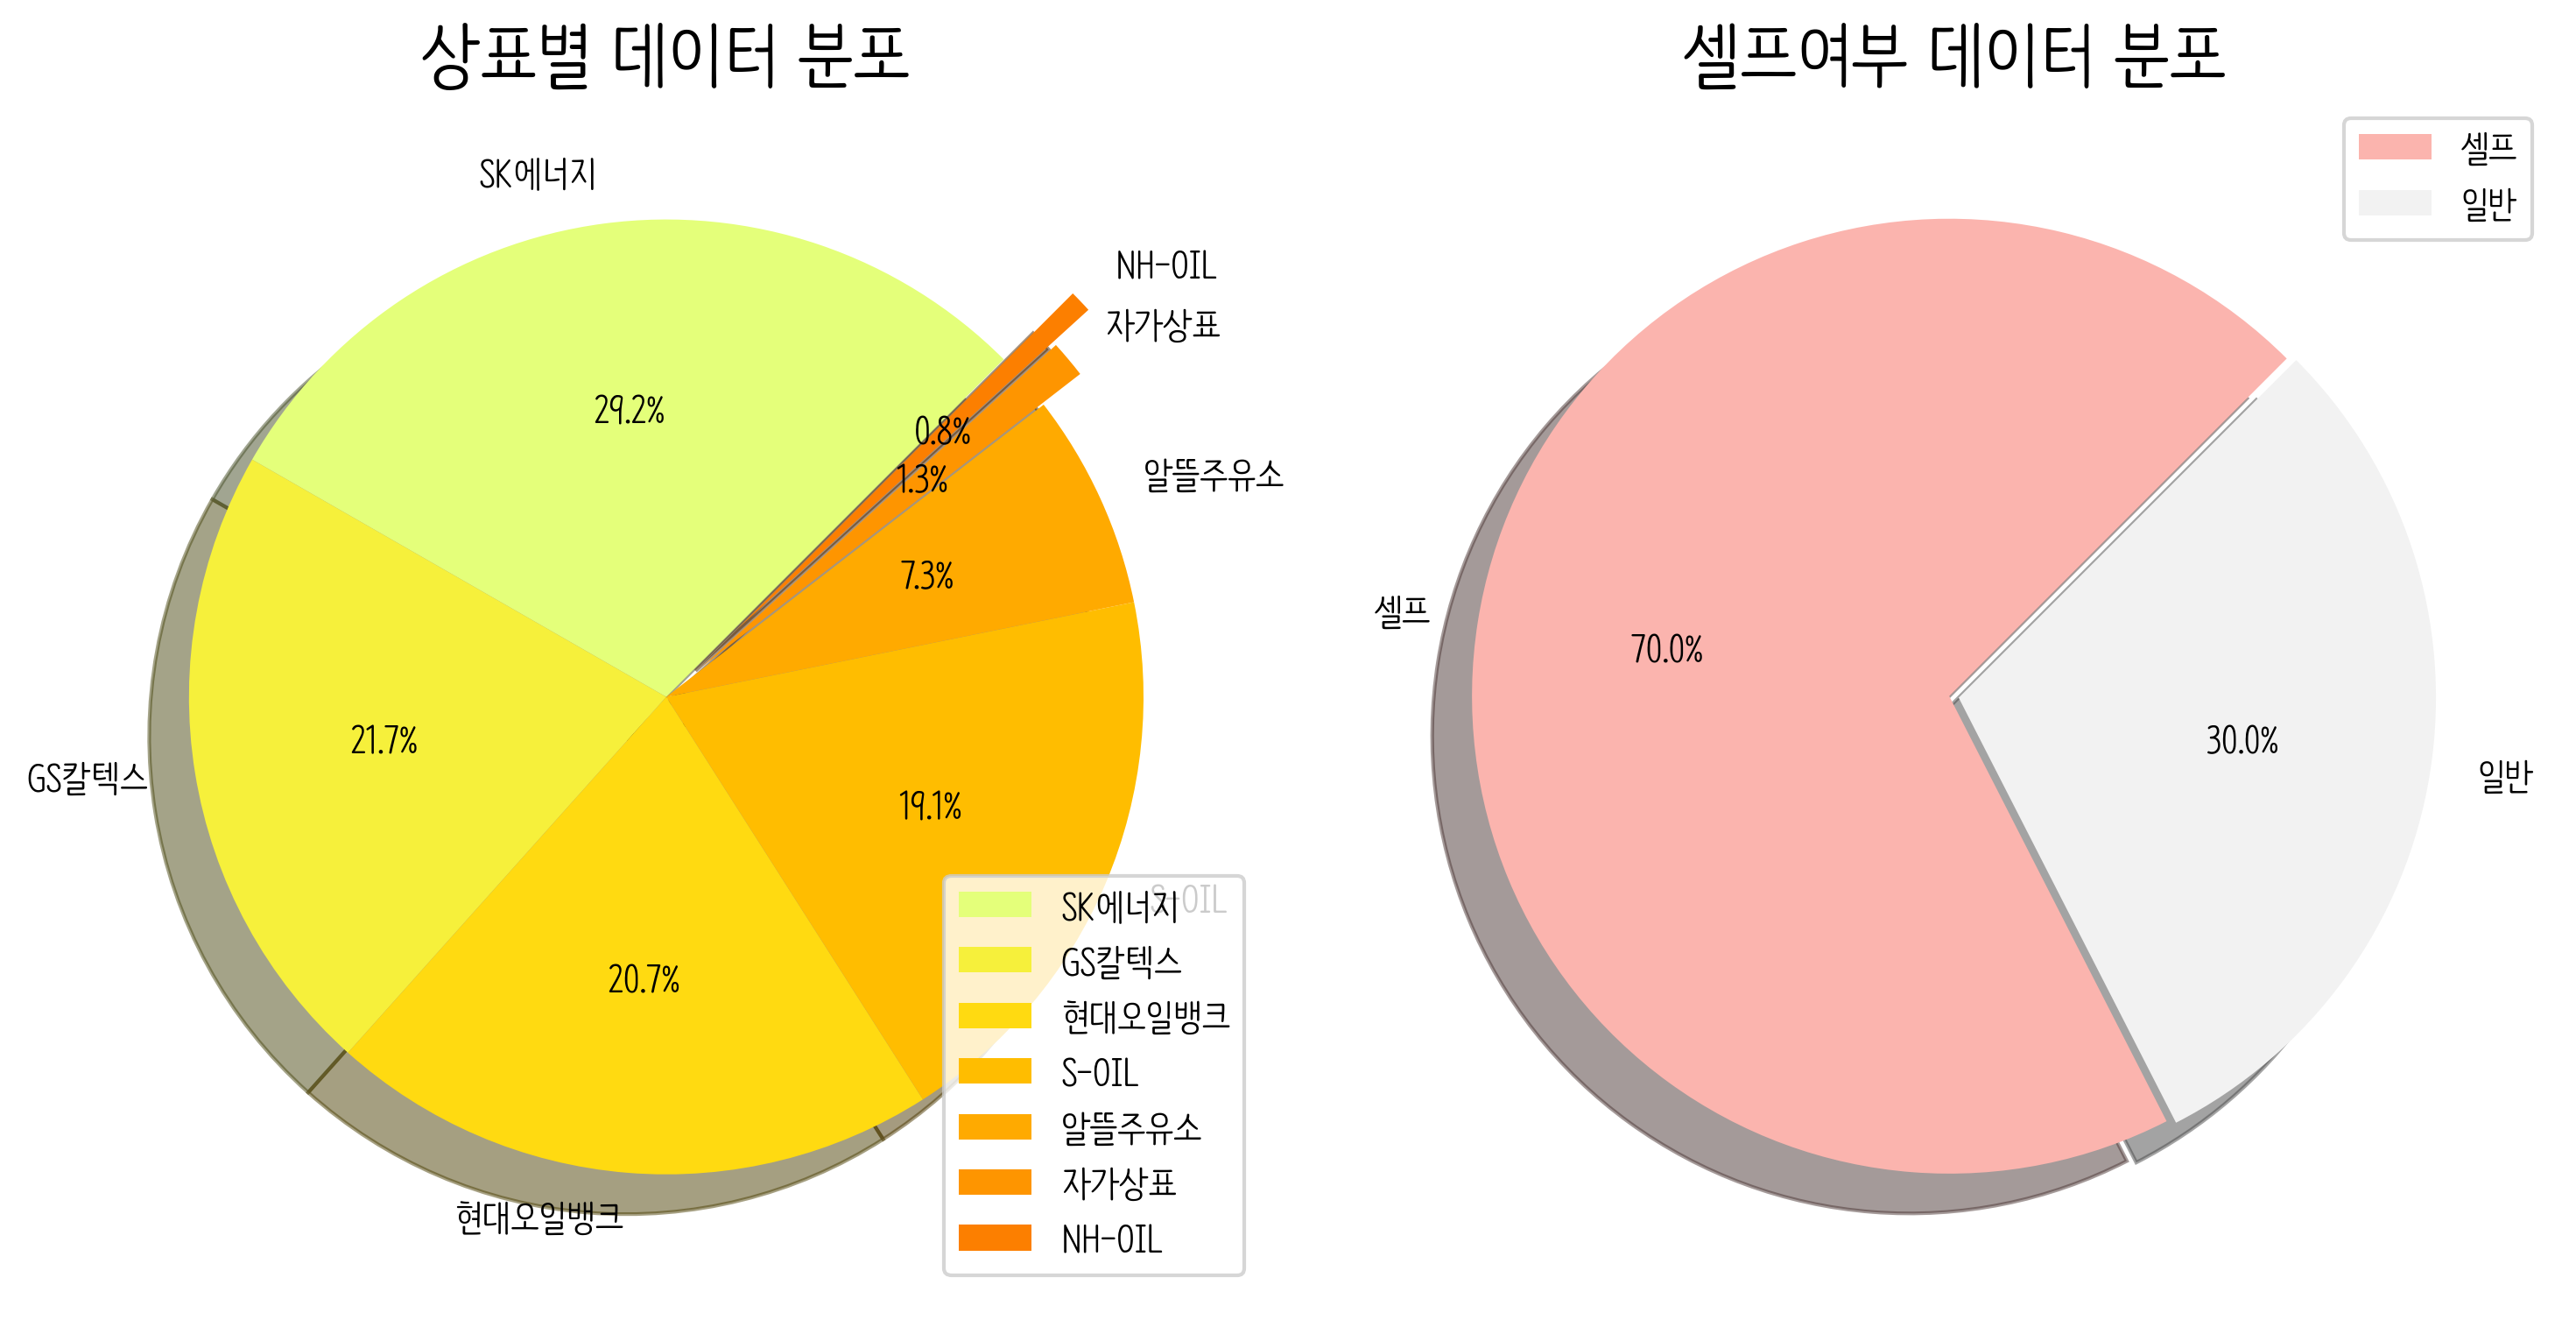

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=300, facecolor='white')

count_df = data_get[['상호','상표','셀프여부']].drop_duplicates()

size = count_df['상표'].value_counts()
labels = count_df['상표'].value_counts().index
colors=plt.cm.Wistia(np.linspace(0,1,count_df['상표'].value_counts().shape[0]))
explode = [0,0,0,0,0,0.1,0.2]

ax[0].pie(size, labels=labels, colors=colors, shadow=True, startangle=45, explode=explode,autopct='%.1f%%')
ax[0].set_title('상표별 데이터 분포',fontsize=20)
ax[0].legend()


size = count_df['셀프여부'].value_counts()
labels = count_df['셀프여부'].value_counts().index
colors = plt.cm.Pastel1(np.linspace(0, 1, 2))
explode = [0.01, 0.01]

ax[1].pie(size, labels=labels, colors=colors, shadow=True, startangle=45, explode=explode,autopct='%.1f%%')
ax[1].set_title('셀프여부 데이터 분포',fontsize=20)
ax[1].legend()

plt.tight_layout()
plt.show()

#### 부산 주유소 위치 시각화

In [ ]:
map = folium.Map(location=[35.160389, 129.043961], zoom_start=10)

for i in all_data.index:
    sub_lat = all_data.loc[i, '위도']
    sub_long = all_data.loc[i, '경도']
    
    title = f"{all_data.loc[i, '상호']} - {all_data.loc[i, '주소']}"
    
    folium.CircleMarker(location=[sub_lat, sub_long],
                        radius=3,
                        tooltip=title).add_to(map)
map

#### 부산 주유소(셀프/일반) 시각화

In [ ]:
all_data['셀프여부'].value_counts()

셀프    279
일반    119
Name: 셀프여부, dtype: int64

<AxesSubplot:xlabel='셀프여부', ylabel='count'>

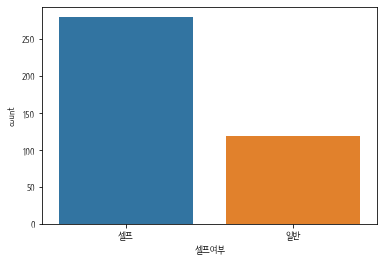

In [ ]:
sns.countplot(data=all_data, x='셀프여부')

In [ ]:
map = folium.Map(location=[35.160389, 129.043961], zoom_start=10)

for i in all_data.index:
    sub_lat = all_data.loc[i, '위도']
    sub_long = all_data.loc[i, '경도']
    
    title = f"{all_data.loc[i, '상호']} - {all_data.loc[i, '주소']}"
    
    color = 'blue'
    if all_data.loc[i, '셀프여부'] == '일반':
        color = 'orange'
    
    folium.CircleMarker(location=[sub_lat, sub_long],
                        radius=3,
                        color=color,
                        tooltip=title).add_to(map)
map